# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

In [2]:
#from pandas_profiling import ProfileReport (es un error porque la versión que tengo de python localmente es muy reciente, para eso mejor debo probar con un entorno virtual)

## Establecer apariencia general de los gráficos

In [71]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
pd.set_option("display.precision",1) # esta es configuración mia

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
df = palmerpenguins.load_penguins_raw()

df.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.9,-24.7,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.4,-25.3,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.8,-25.3,NaN


#### Datos previamente procesados

In [4]:
preprocess_df = palmerpenguins.load_penguins()
preprocess_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Utilizando los conjuntos de datos de `seaborn`

In [5]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [6]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
pre_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [8]:
(
    pre_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
pre_penguin_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [10]:
(
    pre_penguin_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [11]:
(
    pre_penguin_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [12]:
(
    pre_penguin_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

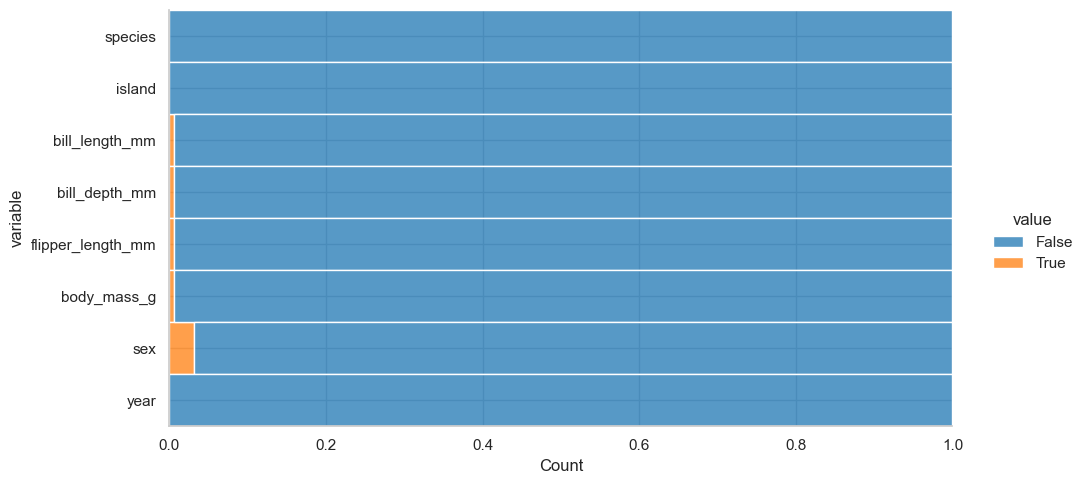

In [13]:
(
    pre_penguin_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
);

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

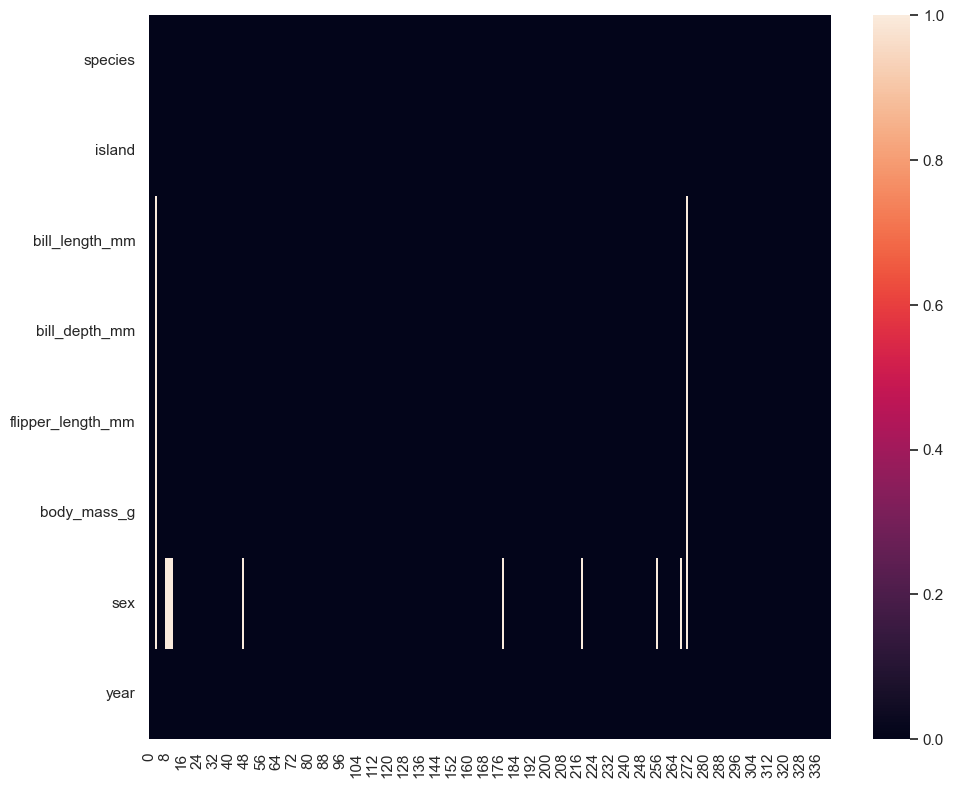

In [14]:
(
    pre_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data=df
            )
        )
    
    )
);

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [15]:
pre_proces_pg_df = (
    pre_penguin_df
    .dropna()
)

pre_proces_pg_df.head(5)
# pasa de 344 a 333 (se pierden 11 filas)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
pre_proces_pg_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.0,333.0,333.0,333.0,333,333.0
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,44.0,17.2,201.0,4207.1,NaN,2008.0
std,NaN,NaN,5.5,2.0,14.0,805.2,NaN,0.8
min,NaN,NaN,32.1,13.1,172.0,2700.0,NaN,2007.0
25%,NaN,NaN,39.5,15.6,190.0,3550.0,NaN,2007.0
50%,NaN,NaN,44.5,17.3,197.0,4050.0,NaN,2008.0
75%,NaN,NaN,48.6,18.7,213.0,4775.0,NaN,2009.0


### Solo las numéricas

In [18]:
pre_proces_pg_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.0,333.0,333.0,333.0,333.0
mean,44.0,17.2,201.0,4207.1,2008.0
std,5.5,2.0,14.0,805.2,0.8
min,32.1,13.1,172.0,2700.0,2007.0
25%,39.5,15.6,190.0,3550.0,2007.0
50%,44.5,17.3,197.0,4050.0,2008.0
75%,48.6,18.7,213.0,4775.0,2009.0
max,59.6,21.5,231.0,6300.0,2009.0


### Solo categóricas - 1

In [19]:
pre_proces_pg_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [20]:
(
    pre_proces_pg_df
    .astype({
        'species': 'category',
        'island' : 'category',
        'sex' : 'category'
    })
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## ¿Cómo visualizar los conteos?

### Pandas

In [21]:
(
    pre_proces_pg_df
    .species
    .value_counts()
)

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

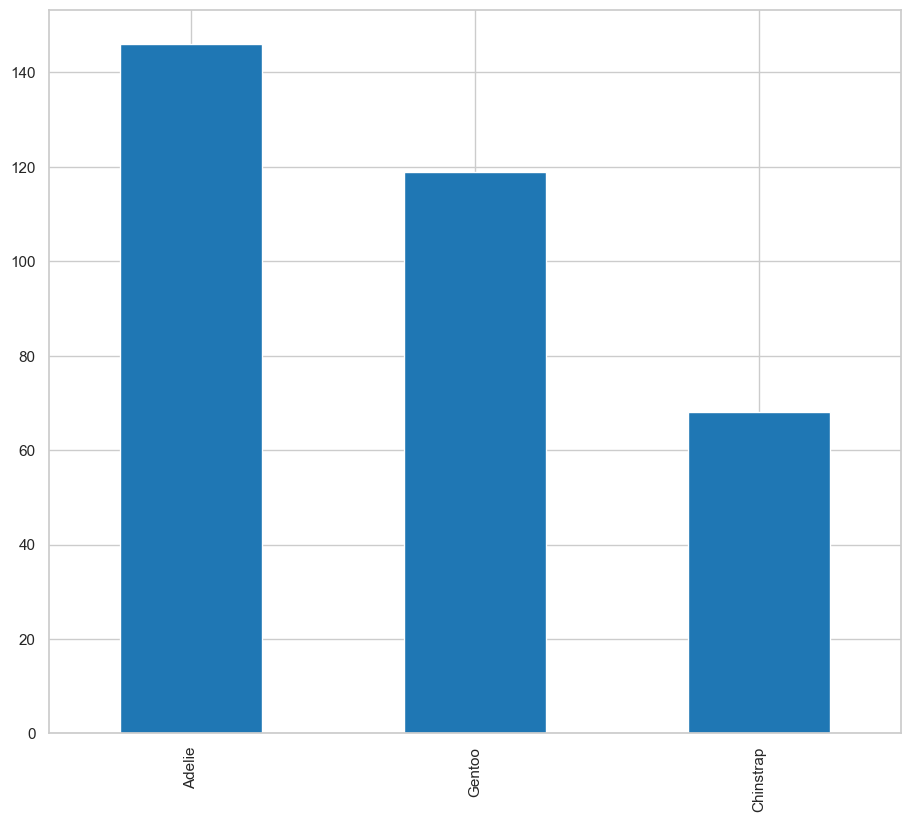

In [23]:
(
    pre_proces_pg_df
    .species
    .value_counts()
    .plot(kind='bar')
);

### Seaborn

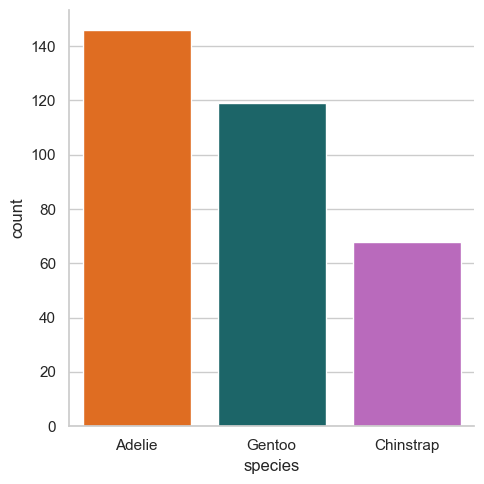

In [26]:
sns.catplot(
    data=pre_proces_pg_df,
    x='species',
    kind='count',
    palette=penguin_color
);

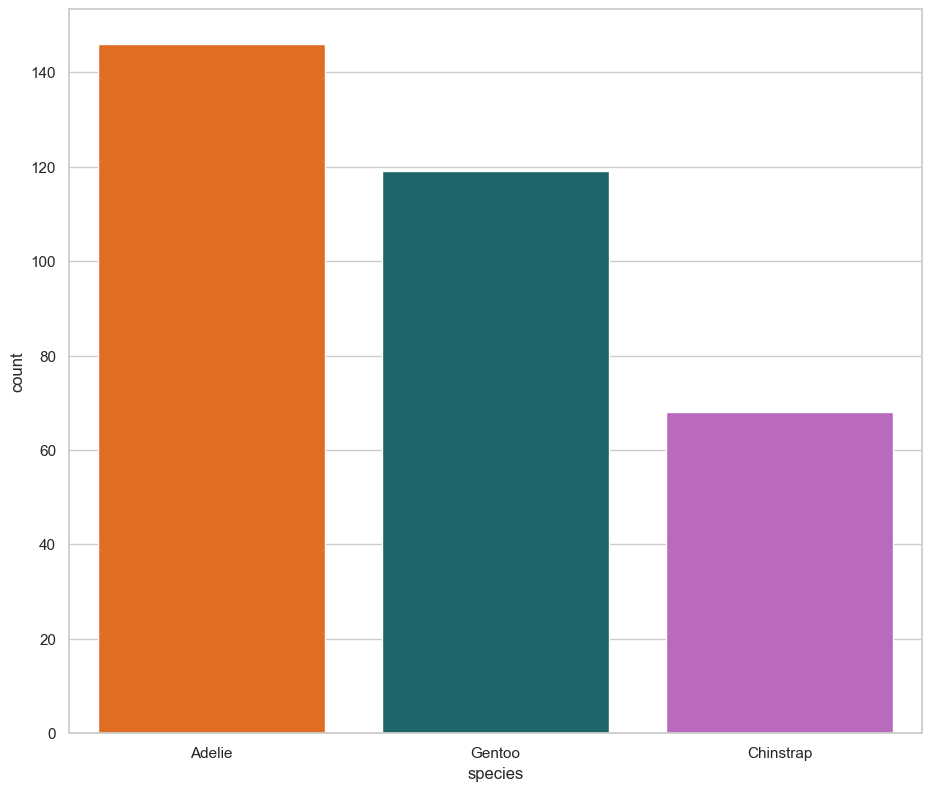

In [32]:
(
    pre_proces_pg_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
);

### ¿Cómo visualizar las proporciones?

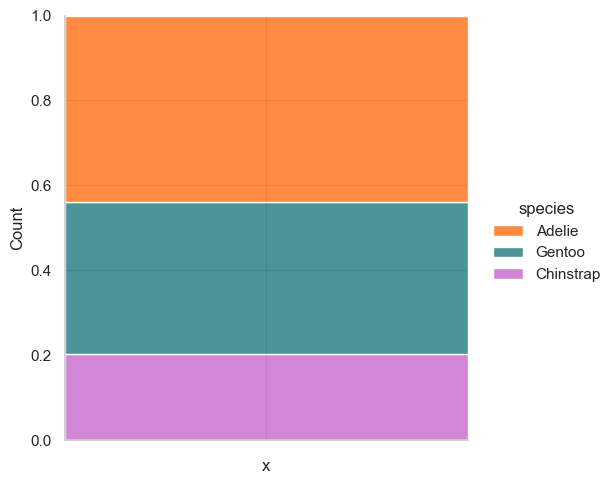

In [39]:
(
    pre_proces_pg_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',
                palette=penguin_color
            )
        )
    )
);

# Medidas de tendencia central

## Media o promedio

## Mediana

## Moda

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [11]:
pre_penguin_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [12]:
pre_penguin_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [13]:
pre_penguin_df.max(numeric_only=True) - pre_penguin_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [15]:
pre_penguin_df.std(numeric_only=True)

bill_length_mm         5.5
bill_depth_mm          2.0
flipper_length_mm     14.1
body_mass_g          802.0
year                   0.8
dtype: float64

In [16]:
pre_penguin_df.mean(numeric_only=True)

bill_length_mm         43.9
bill_depth_mm          17.2
flipper_length_mm     200.9
body_mass_g          4201.8
year                 2008.0
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [18]:
pre_penguin_df.quantile(0.75)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22772\1976650142.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.75)


bill_length_mm         48.5
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4750.0
year                 2009.0
Name: 0.75, dtype: float64

In [19]:
pre_penguin_df.quantile(0.25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22772\540973832.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.25)


bill_length_mm         39.2
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [20]:
pre_penguin_df.quantile(0.75) - pre_penguin_df.quantile(0.25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22772\1559532247.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pre_penguin_df.quantile(0.75) - pre_penguin_df.quantile(0.25)


bill_length_mm          9.3
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1200.0
year                    2.0
dtype: float64

In [22]:
(
    pre_penguin_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22772\2650761930.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .quantile(q=[0.75, 0.50, 0.25])


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.5,44.5,39.2,9.3
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4750.0,4050.0,3550.0,1200.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

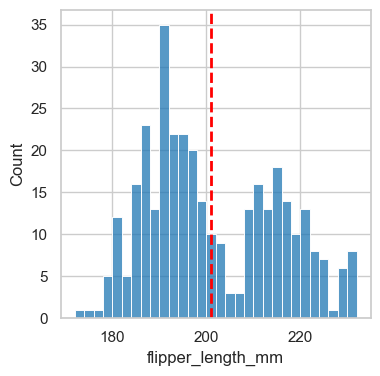

In [39]:
plt.figure(figsize=(4,4))

sns.histplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    binwidth=2
)

plt.axvline(
    x=pre_penguin_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.show()

### Diagrama de caja / boxplot

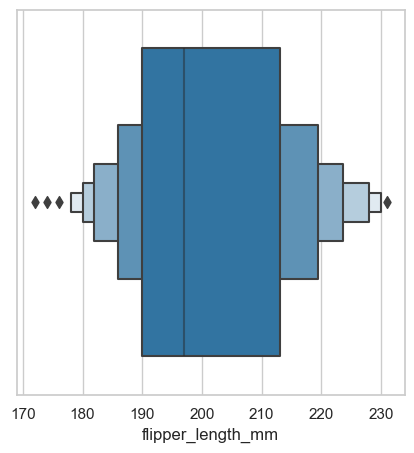

In [36]:
plt.figure(figsize=(5,5))

sns.boxenplot(
    pre_penguin_df,
    x='flipper_length_mm'
    )

plt.show()

### Limitaciones

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

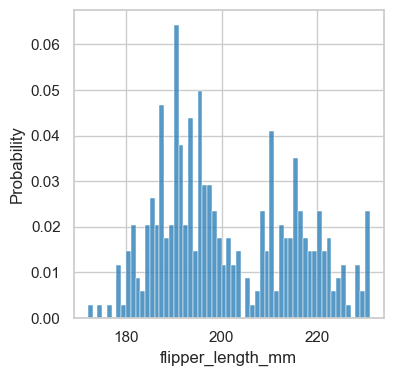

In [48]:
plt.figure(figsize=(4,4))

sns.histplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'
);

# esto es un PMF

### Utilizando `empiricaldist`

In [53]:
pmf_flipper_length = empiricaldist.Pmf.from_seq(
    pre_penguin_df.flipper_length_mm,
    normalize=True
)

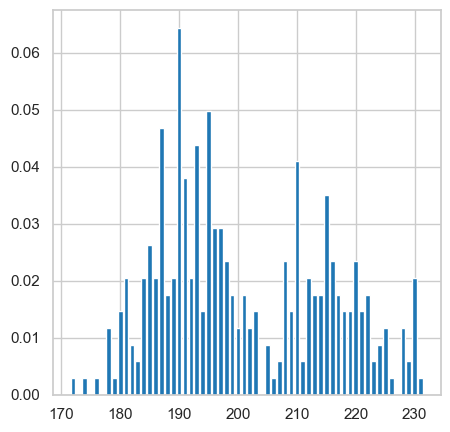

In [58]:
plt.figure(figsize=(5,5))

pmf_flipper_length.bar()

In [56]:
pmf_flipper_length(190) # probabilidad de encontrar un pinguino con una lungitud de alas de 190 mm

0.06432748538011696

In [57]:
pre_penguin_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

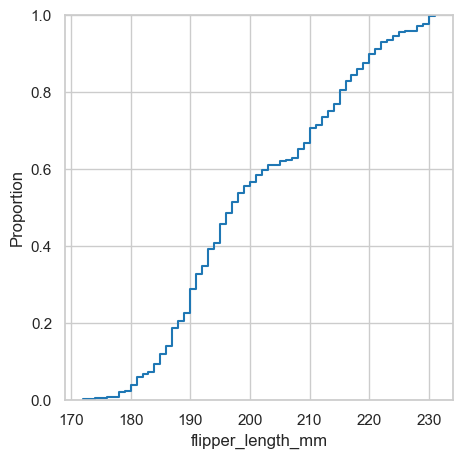

In [60]:
plt.figure(figsize=(5,5))

sns.ecdfplot(
    data=pre_penguin_df,
    x='flipper_length_mm'
)

### Utilizando `empiricaldist`

In [63]:
cdf_flipper_length = empiricaldist.Cdf.from_seq(
    pre_penguin_df.flipper_length_mm,
    normalize=True
)

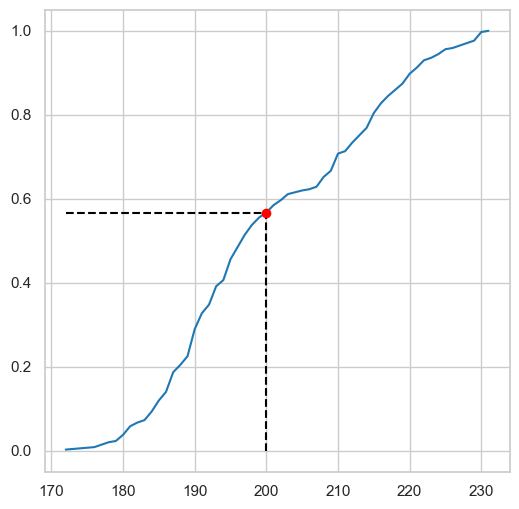

In [69]:
plt.figure(figsize=(6,6))

cdf_flipper_length.plot()

q = 200 # encontrar un pinguino que tenga 200 o menos
p = cdf_flipper_length.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyles='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length.qs[0],
    xmax=q,
    color='black',
    linestyles='dashed'
)

plt.plot(q, p, 'ro');

### Comparando distribuciones

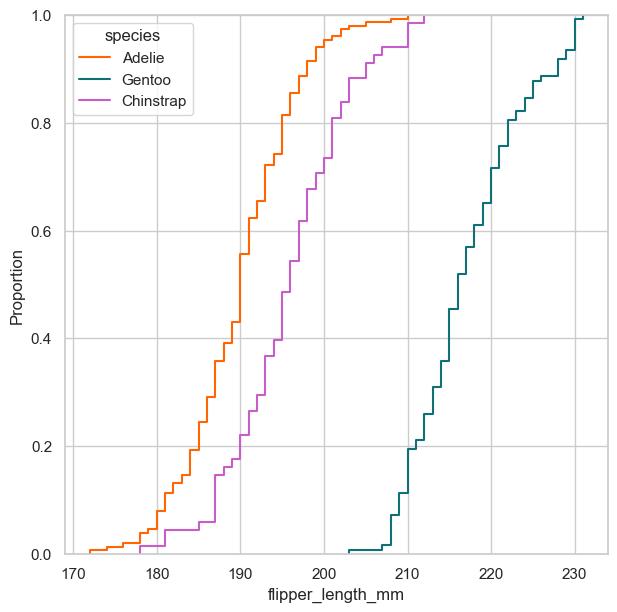

In [75]:
plt.figure(figsize=(7,7))

sns.ecdfplot(
    data=pre_penguin_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
);

### 1 Commit GIT

## Funciones de densidad de probabilidad

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

## Teorema del Límite Central

# Estableciendo relaciones: Gráfica de puntos

# Estableciendo relaciones: Gráficos de violín y boxplots

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

## ¿Cómo puedo visualizar los coeficientes de correlación?

## ¿Cómo podría representar una variable categórica como númerica discreta?

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

# Estableciendo relaciones: Análisis de regresión simple

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb8b09fe-58e5-4e41-98af-4532009b73b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>